# Module 3 Assignment - Cleaning “Messy” Data

#### Group Member: Jinming Chen, Shichao Zhou

In [1]:
#load all the libraries that are needed
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
# start by reading a set of sample data from github. This data set contains information related to automobile.
df = pd.read_csv("https://raw.githubusercontent.com/sczhou0705/DAV-6150-2/main/M3_Data%20(1).csv")
df.head()

,Unnamed: 0,INDEX,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS
0,0,1,3,3.2,1.160,0.98,54.2,0.567,NaN,268.0,0.99280,3.33,0.59,9.9,0,8,2.0
1,1,2,3,4.5,0.160,0.81,26.1,0.425,15.0,327.0,1.02792,3.38,0.70,NaN,-1,7,3.0
2,2,4,5,7.1,2.640,0.88,14.8,0.037,214.0,142.0,0.99518,3.12,0.48,22.0,-1,8,3.0
3,3,5,3,5.7,0.385,0.04,18.8,0.425,22.0,115.0,0.99640,2.24,1.83,6.2,-1,6,1.0
4,4,6,4,8.0,0.330,1.26,9.4,NaN,167.0,108.0,0.99457,3.12,1.77,13.7,0,9,2.0


In [3]:
data= df.drop(columns=['Unnamed: 0','INDEX'])


In [4]:
#describe the dataset
data.describe()

,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS
count,12795.000000,12795.000000,12795.000000,12795.000000,12179.000000,12157.000000,12148.000000,12113.000000,12795.000000,12400.000000,11585.000000,12142.000000,12795.000000,12795.000000,9436.000000
mean,3.029074,8.063251,0.641086,0.686315,23.367809,0.222559,106.679042,204.319120,0.994203,3.207628,0.846668,10.523778,-0.009066,7.772724,2.041755
std,1.926368,4.996119,0.555614,0.606005,24.945667,0.234288,108.102694,163.116881,0.026538,0.679687,0.655612,3.629154,0.891089,1.323926,0.902540
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.888090,0.480000,0.000000,0.000000,-2.000000,4.000000,1.000000
25%,2.000000,5.600000,0.250000,0.280000,3.600000,0.046000,28.000000,100.000000,0.987720,2.960000,0.430000,9.000000,-1.000000,7.000000,1.000000
50%,3.000000,7.000000,0.410000,0.440000,12.900000,0.098000,56.000000,154.000000,0.994490,3.200000,0.590000,10.400000,0.000000,8.000000,2.000000
75%,4.000000,9.800000,0.910000,0.970000,38.700000,0.368000,172.000000,262.000000,1.000515,3.470000,1.100000,12.400000,1.000000,8.000000,3.000000
max,8.000000,34.400000,3.680000,3.860000,141.150000,1.351000,623.000000,1057.000000,1.099240,6.130000,4.240000,26.500000,2.000000,17.000000,4.000000


In [5]:
data.nunique()

TARGET                   9
FixedAcidity           313
VolatileAcidity        510
CitricAcid             347
ResidualSugar         1342
Chlorides              996
FreeSulfurDioxide      617
TotalSulfurDioxide     858
Density               5933
pH                     497
Sulphates              382
Alcohol                361
LabelAppeal              5
AcidIndex               14
STARS                    4
dtype: int64

In [6]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12795 entries, 0 to 12794
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   TARGET              12795 non-null  int64  
 1   FixedAcidity        12795 non-null  float64
 2   VolatileAcidity     12795 non-null  float64
 3   CitricAcid          12795 non-null  float64
 4   ResidualSugar       12179 non-null  float64
 5   Chlorides           12157 non-null  float64
 6   FreeSulfurDioxide   12148 non-null  float64
 7   TotalSulfurDioxide  12113 non-null  float64
 8   Density             12795 non-null  float64
 9   pH                  12400 non-null  float64
 10  Sulphates           11585 non-null  float64
 11  Alcohol             12142 non-null  float64
 12  LabelAppeal         12795 non-null  int64  
 13  AcidIndex           12795 non-null  int64  
 14  STARS               9436 non-null   float64
dtypes: float64(12), int64(3)
memory usage: 1.5 MB


In [7]:
data.isnull().sum()/(len(data))*100

TARGET                 0.000000
FixedAcidity           0.000000
VolatileAcidity        0.000000
CitricAcid             0.000000
ResidualSugar          4.814381
Chlorides              4.986323
FreeSulfurDioxide      5.056663
TotalSulfurDioxide     5.330207
Density                0.000000
pH                     3.087143
Sulphates              9.456819
Alcohol                5.103556
LabelAppeal            0.000000
AcidIndex              0.000000
STARS                 26.252442
dtype: float64

# Exploratory Data Analysis (EDA)

### Histograms

C:\Users\zhous\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\zhous\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\zhous\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

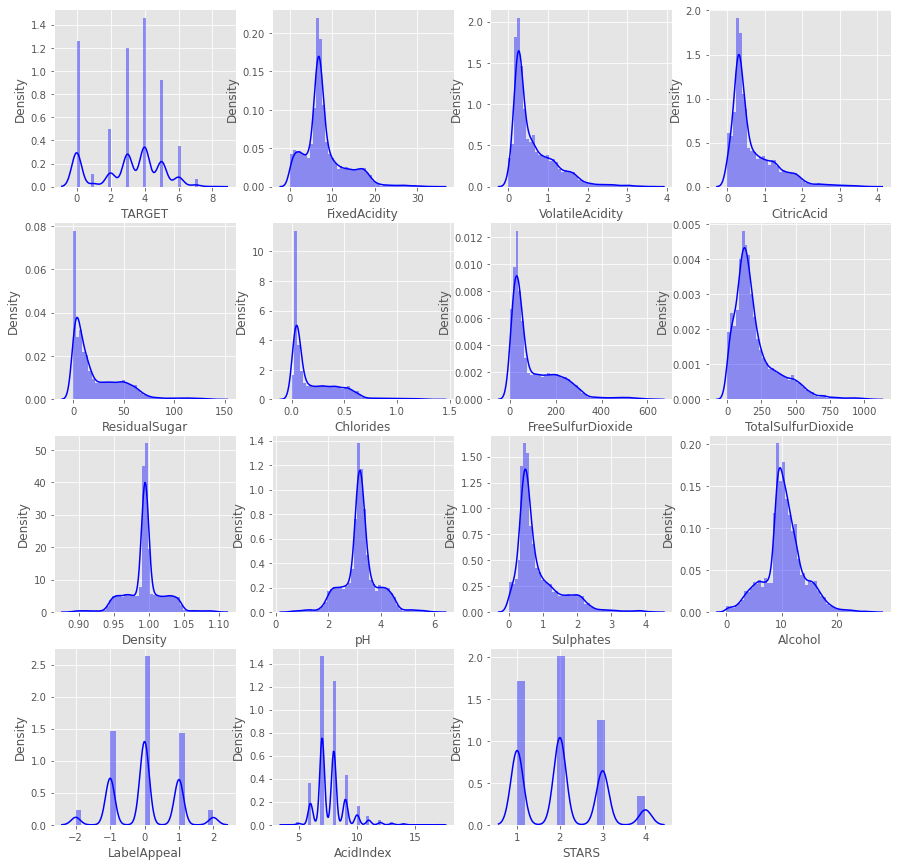

In [22]:
#show the distribution of all variables by using "for loop" 
i=0
numerical_columns = data.columns
for col in numerical_columns:
    i+=1
    plt.subplot(4,4,i)
    plt.style.use('ggplot')
    plt.rcParams['figure.figsize'] = (15,15)
    sns.distplot(data[col], color = 'blue')

C:\Users\zhous\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\zhous\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\zhous\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\zhous\anaconda3\lib\si

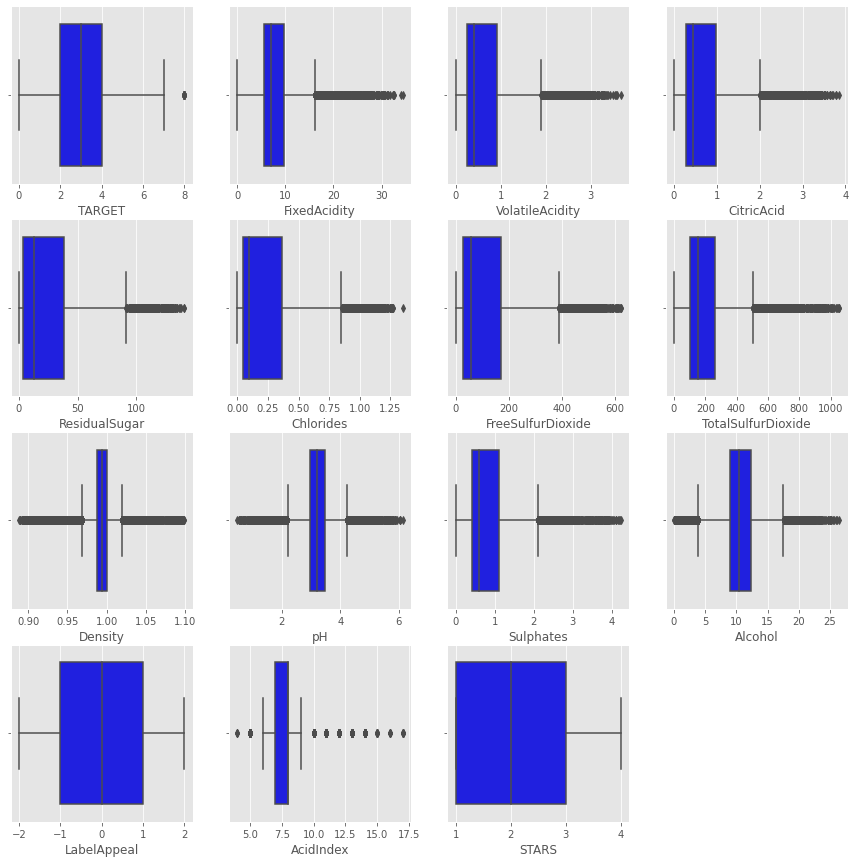

In [9]:
#show the distribution of all variables by using "for loop" 
i=0
numerical_columns = data.columns
for col in numerical_columns:
    i+=1
    plt.subplot(4,4,i)
    plt.style.use('ggplot')
    plt.rcParams['figure.figsize'] = (15,15)
    sns.boxplot(data[col], color = 'blue')

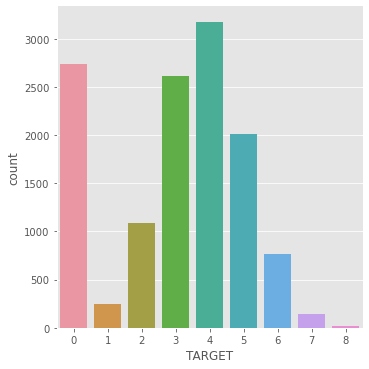

In [10]:
# 
sns.catplot(x='TARGET',data=data,kind='count')

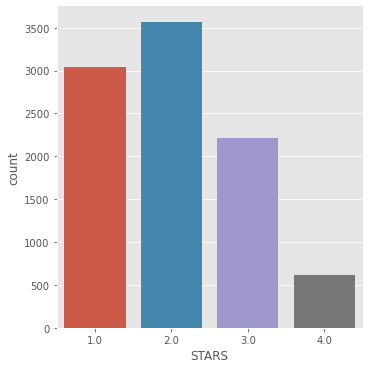

In [11]:
#Wine rating as determined by experts (4 = excellent; 1 = Poor)
sns.catplot(x='STARS',data=data,kind='count')

### Heatmap

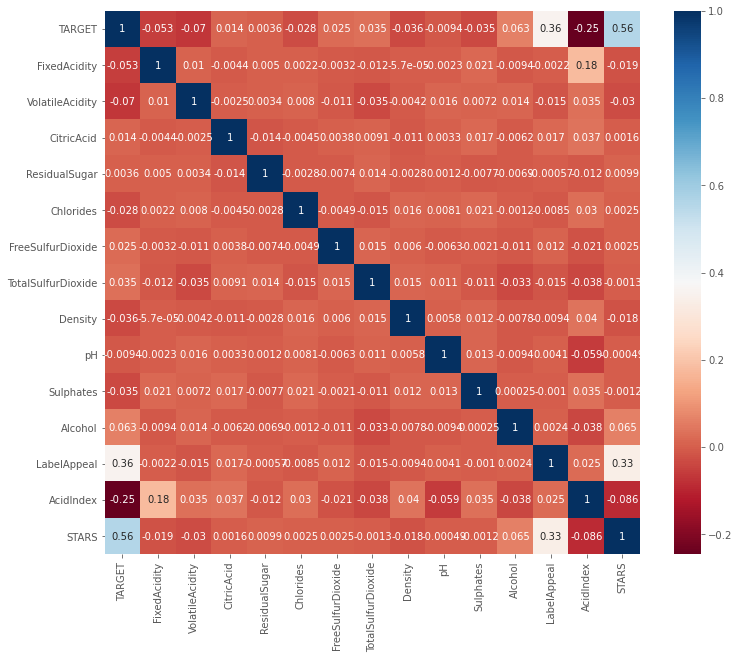

In [12]:
# Heatmap

# Finding the correlation bewteen the Features.
plt.figure(figsize=(12,10))

corr = data.corr()# plot the heatmap
sns.heatmap(corr, cmap="RdBu",xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot=True)

# show the heatmap
plt.show()

In [13]:
data.corr()

,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS
TARGET,1.000000,-0.052984,-0.070195,0.013953,0.003645,-0.028463,0.024503,0.035253,-0.035518,-0.009445,-0.035259,0.063394,0.356500,-0.246049,0.558794
FixedAcidity,-0.052984,1.000000,0.010195,-0.004378,0.005040,0.002232,-0.003158,-0.012379,-0.000057,-0.002324,0.020987,-0.009406,-0.002240,0.179916,-0.018505
VolatileAcidity,-0.070195,0.010195,1.000000,-0.002511,0.003443,0.008041,-0.010797,-0.035379,-0.004208,0.016246,0.007220,0.014157,-0.015353,0.035434,-0.030154
CitricAcid,0.013953,-0.004378,-0.002511,1.000000,-0.013510,-0.004550,0.003845,0.009138,-0.010854,0.003293,0.017488,-0.006218,0.017322,0.036506,0.001627
ResidualSugar,0.003645,0.005040,0.003443,-0.013510,1.000000,-0.002837,-0.007418,0.014476,-0.002794,0.001203,-0.007658,-0.006927,-0.000567,-0.011646,0.009897
Chlorides,-0.028463,0.002232,0.008041,-0.004550,-0.002837,1.000000,-0.004884,-0.015316,0.016483,0.008080,0.021366,-0.001174,-0.008534,0.029846,0.002516
FreeSulfurDioxide,0.024503,-0.003158,-0.010797,0.003845,-0.007418,-0.004884,1.000000,0.014710,0.005979,-0.006287,-0.002096,-0.011384,0.011858,-0.021074,0.002465
TotalSulfurDioxide,0.035253,-0.012379,-0.035379,0.009138,0.014476,-0.015316,0.014710,1.000000,0.014692,0.010575,-0.010995,-0.033102,-0.015027,-0.037786,-0.001291
Density,-0.035518,-0.000057,-0.004208,-0.010854,-0.002794,0.016483,0.005979,0.014692,1.000000,0.005768,0.012044,-0.007828,-0.009370,0.040413,-0.018284
pH,-0.009445,-0.002324,0.016246,0.003293,0.001203,0.008080,-0.006287,0.010575,0.005768,1.000000,0.013386,-0.009365,0.004138,-0.058676,-0.000488


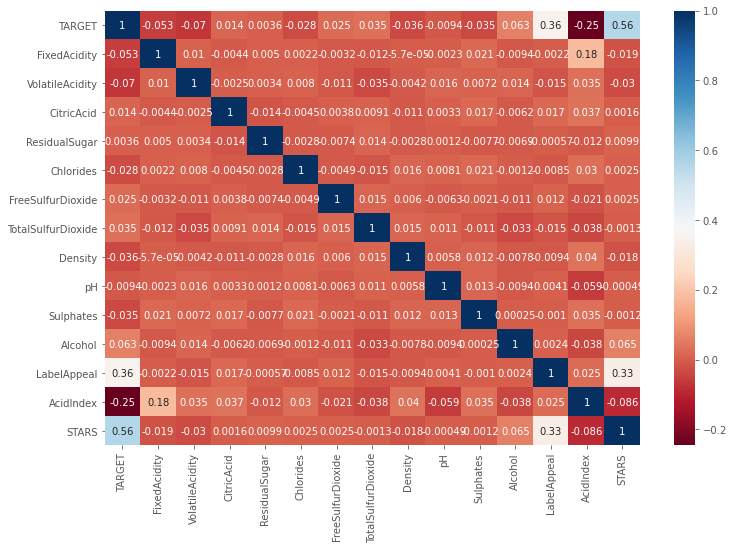

In [14]:

#correlation heatmap 
plt.figure(figsize=(12,8))
ax = sns.heatmap(data.corr(), cmap='RdBu', annot=True)
plt.show()

## 

In [15]:
# import library
from sklearn.impute import KNNImputer

In [16]:
# create new dataframe for columns with null values
df_null = df[['ResidualSugar','Chlorides','FreeSulfurDioxide','TotalSulfurDioxide','pH','Sulphates','Alcohol','STARS']]
df_null.head()

,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,pH,Sulphates,Alcohol,STARS
0,54.2,0.567,NaN,268.0,3.33,0.59,9.9,2.0
1,26.1,0.425,15.0,327.0,3.38,0.70,NaN,3.0
2,14.8,0.037,214.0,142.0,3.12,0.48,22.0,3.0
3,18.8,0.425,22.0,115.0,2.24,1.83,6.2,1.0
4,9.4,NaN,167.0,108.0,3.12,1.77,13.7,2.0


In [17]:
#normalize values between 0-1
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(df_null), columns = df_null.columns)
df.head()

,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,pH,Sulphates,Alcohol,STARS
0,0.383989,0.419689,NaN,0.253548,0.504425,0.139151,0.373585,0.333333
1,0.184910,0.314582,0.024077,0.309366,0.513274,0.165094,NaN,0.666667
2,0.104853,0.027387,0.343499,0.134342,0.467257,0.113208,0.830189,0.666667
3,0.133192,0.314582,0.035313,0.108798,0.311504,0.431604,0.233962,0.000000
4,0.066596,NaN,0.268058,0.102176,0.467257,0.417453,0.516981,0.333333


In [18]:
#dealing with missing data by using knn imputation
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
df = pd.DataFrame(imputer.fit_transform(df_null),columns = df_null.columns)

In [23]:
# check if null values still exist
# df.isna().any()
df.isna().sum()

ResidualSugar         0
Chlorides             0
FreeSulfurDioxide     0
TotalSulfurDioxide    0
pH                    0
Sulphates             0
Alcohol               0
STARS                 0
dtype: int64

In [21]:
df.head()

,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,pH,Sulphates,Alcohol,STARS
0,54.2,0.5670,52.4,268.0,3.33,0.59,9.90,2.0
1,26.1,0.4250,15.0,327.0,3.38,0.70,10.11,3.0
2,14.8,0.0370,214.0,142.0,3.12,0.48,22.00,3.0
3,18.8,0.4250,22.0,115.0,2.24,1.83,6.20,1.0
4,9.4,0.1542,167.0,108.0,3.12,1.77,13.70,2.0


# Reference: 